# Декомпозиция проекта:

 1. [Введение](#p1)
      * [Описание проекта](#p1.1)  
      * [Задачи проекта](#p1.2)
      * [Описание данных](#p1.3)

 2. [Загрузка и изучение данных:](#p2)
      * [Загрузка данных](#p2.1)  
      * [Изучение данных](#p2.2)
      * [Вывод](#p2.3)

 3. [Предобработка данных:](#p3)
      * [Приведение названия столбцов к стандартному виду](#p3.1)  
      * [Преобразование данных к необходимому для анализа типу](#p3.2)
      * [Проверка данных на явные и неявные дубликаты](#p3.3)
      * [Проверка данных на пропуски и аномалии](#p3.4)
      * [Объединение таблиц](#p3.5)
      * [Вывод](#p3.6)

 4. [Исследовательский анализ данных:](#p4)
      * [ICE и RICE](#p4.1)
          * [Вывод](#p)
      * [A/B тест](#p4.2)
          * [Графики комулятивных показателей](#p4.2.1)
          * [Выбивающиеся значения](#p4.2.2)
          * [Формулировка нулевых и альтернативных гипотиз](#p4.2.3)
          * [Проверка статистических гипотез](#p4.2.4)
          * [Вывод](#p4.2.5)

 5. [Рекомендации](#p5)
   

<a id="p1"></a>
## 1 Введение

<a id="p1.1"></a>
### 1.1 Описание проекта

В рамках данного проекта необходимо приоритизировать полученные гипотезы, а также изучить и проанализировать результаты А/В теста.

<a id="p1.2"></a>
### 1.2 Задачи проекта

1)Приоритизировать полученные гипотезы применив методы ICE и RICE и сравнить результаты.

2)Произвести анализ результата A/B теста.

<a id="p1.3"></a>
### 1.3 Описание данных

Данные для первой части:

Файл /datasets/hypothesis.csv

* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение * Efforts, тем дороже проверка гипотезы.

Данные для второй части:

Файл /datasets/orders.csv

* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv. Скачать датасет

* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

<a id="p2"></a>
## 2 Загрузка и изучение данных

<a id="p2.1"></a>
### 2.1 Загрузка данных

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import scipy.stats as stats


In [2]:
hypothesis, orders, visitors = (
    pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv'),
    pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv'),
    pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')
) 

<a id="p2.2"></a>
###  2.2 Изучение данных

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Представлено 9 гипотиз 

In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Все данные приведены к корректному типу

In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Необходимо привести данные колонки date к типу datetime

In [6]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Необходимо привести данные колонки date к типу datetime

<a id="p2.3"></a>
###  2.3 Вывод

В hypothesis представлено 9 гипотез, в orders и visitors необходимо поправить тип данных и привести название столбцов к стандартному, легко читаемому виду.

<a id="p3"></a>
## 3 Предобработка данных

<a id="p3.1"></a>
### 3.1 Приведение названия столбцов к стандартному виду

In [7]:
orders.rename(columns = {'transactionId' : 'transaction_id', 'visitorId' : 'visitor_id'}, inplace = True)

<a id="p3.2"></a>
### 3.2 Преобразование данных к необходимому для анализа типу

In [8]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

<a id="p3.3"></a>
### 3.3 Проверка данных на явные и неявные дубликаты

In [9]:
for i in (visitors, orders):
    print(i.duplicated().any())

False
False


Дубликатов нет

<a id="p3.4"></a>
### 3.4 Проверка данных на пропуски и аномалии

In [10]:
print(orders.isna().sum())
print(visitors.isna().sum())

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64
date        0
group       0
visitors    0
dtype: int64


Пропусков нет

Проверим таблицу orders на соблюдение условий проведения a/b тестирования:

если есть пользователи, которые попали и в группу А и в группу B удалим их и посмотрим сколько данных мы потеряем.Созданим даполнительный пареметр ignore, в случае если захотим провести анализ данных без изменения, передадим ему значение True

In [11]:
orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [12]:
len(
    np.intersect1d(orders.query('group == "A"')['visitor_id']
    , orders.query('group == "B"')['visitor_id']
    , assume_unique = False)
)

58

58 пользователей находятся и в группе А и в группе В

In [13]:
ignore = False
if not ignore:
    a = orders[orders['group'] == 'A']['visitor_id'].drop_duplicates().reset_index()
    b = orders[orders['group'] == 'B']['visitor_id'].drop_duplicates().reset_index()
    c = a.loc[a['visitor_id'].isin(b['visitor_id'])]
    orders = orders.loc[~(orders['visitor_id'].isin(c['visitor_id']))]

In [14]:
orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


При обработке было удалено 15 процентов данных, однако это необходимая мера для проведения точного A/B теста, так же стоит заметить, что нет возможности удалить данных пользователей из visitors

In [15]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [16]:
visitors.groupby('group', as_index = False).agg({'visitors': 'sum'})

,group,visitors
0,A,18736
1,B,18916


Количество пользователей за период исследования примерно равно( разница менее 1 процента), 
не идеально, но удовлетворяет условиям А/В теста

<a id="p3.6"></a>
### 3.6 Вывод

На данном этапе данные были приведены к необходимому типу для дальнейшего анализа, проверены на наличие дубликатов и пропусков, а так же из visitors исключины пользователи относившиеся к двум группам тестирования

<a id="p4"></a>
## 4 Исследовательский анализ данных

<a id="p4.1"></a>
### 4.1 ICE и RICE

Изучим гипотезы подробнее

In [17]:
pd.options.display.max_colwidth = 150
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Рассчитаем ICE для гипотиз и построим график

In [18]:
hypothesis['Ice'] = round(hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts'])

hypothesis[['Hypothesis', 'Ice']].sort_values('Ice', ascending = False)

,Hypothesis,Ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.0


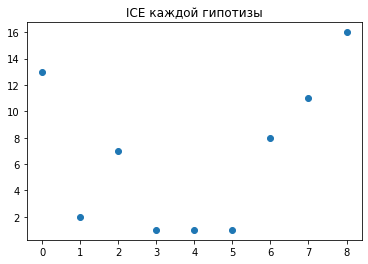

In [19]:
plt.scatter(hypothesis.index, hypothesis['Ice'])
plt.title('ICE каждой гипотизы');

Лучшая гипотезой по параметру ICE - гипотеза с индексом 8(Запустить акцию, дающую скидку на товар в день рождения)

Рассчитаем RICE для гипотез и построим график

In [20]:
hypothesis['Rice'] = round(hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts'])
hypothesis[['Hypothesis', 'Rice']].sort_values('Rice', ascending = False)

,Hypothesis,Rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


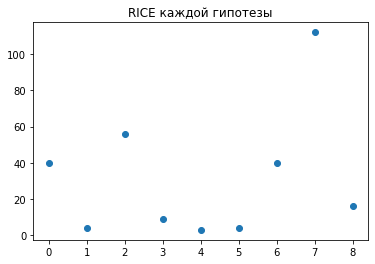

In [21]:
plt.scatter(hypothesis.index, hypothesis['Rice'])
plt.title('RICE каждой гипотезы');

Лучшая гипотезой по параметру RICE - гипотеза с индексом 7(Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок)

<a id="p"></a>
#### 4.1.1 Вывод
При приоритизации гипотез основным показателем был выбран RICE, так как он учитывает охват пользователей. Это видно на примере гипотезы о запуске акции, дающей скидку на товар в день рождения, что показывало лучший результат по показателю ICE, но спустилось на 5 место по RICE. У этой гипотезы был минимальный охват, возможно не все пользователи указывали свои дни рождения. Другая гипотеза о добавлении формы подписки на все основные страницы чтобы собрать базу клиентов для email-рассылок, имеет максимальный охват, а значит затронет всех пользователей, что в совокупности с другими высокими показателями должно дать лучший результат.

Приоритетной гипотезой выбрана гипотеза с индексом 7(Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок)

<a id="p4.2"></a>
### 4.2  A/B тест

<a id="p4.2.1"></a>
#### 4.2.1  Графики комулятивных показателей

Создадим массив уникальных пар значений дат и групп теста

In [22]:
orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


In [23]:
datesGroups = orders[['date', 'group']].drop_duplicates()
datesGroups

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


Соберём агрегированные кумулятивные по дням, для visitors и orders

In [24]:
orders_new = datesGroups.apply(
    lambda x : orders[
    np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group']
    )].agg(
    {'date': 'max',
     'group': 'max',
      'transaction_id': 'nunique',
     'visitor_id': 'nunique',
     'revenue' : 'sum'
    }
    ), axis =1).sort_values(['date', 'group'])
orders_new

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854
...,...,...,...,...,...
533,2019-08-29,B,510,490,4746610
757,2019-08-30,A,460,437,3311413
690,2019-08-30,B,531,511,4955833
958,2019-08-31,A,468,445,3364656


In [25]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [26]:
visitors_new = datesGroups.apply(
    lambda x : visitors[
    np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group']
    )].agg(
    {'date': 'max',
     'group': 'max',
     'visitors' : 'sum'
    }
    ), axis =1).sort_values(['date', 'group'])
visitors_new

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
533,2019-08-29,B,17708
757,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


Объединим две таблицы и переименуем столбцы, чтобы лучше ориентироваться в данны. Дополнительно расчитаем конверсию и средний чек по дням

In [27]:
df = orders_new.merge(visitors_new, left_on = ['date', 'group'], right_on = ['date', 'group'])
df.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
df['conversion'] = df['orders']/df['visitors']
df['mean'] = df['revenue']/df['orders']
df

,date,group,orders,buyers,revenue,visitors,conversion,mean
0,2019-08-01,A,23,19,142779,719,0.031989,6207.782609
1,2019-08-01,B,17,17,59758,713,0.023843,3515.176471
2,2019-08-02,A,42,36,234381,1338,0.031390,5580.500000
3,2019-08-02,B,40,39,221801,1294,0.030912,5545.025000
4,2019-08-03,A,66,60,346854,1845,0.035772,5255.363636
...,...,...,...,...,...,...,...,...
57,2019-08-29,B,510,490,4746610,17708,0.028801,9307.078431
58,2019-08-30,A,460,437,3311413,18037,0.025503,7198.723913
59,2019-08-30,B,531,511,4955833,18198,0.029179,9333.018832
60,2019-08-31,A,468,445,3364656,18736,0.024979,7189.435897


Создадим две таблицы с данными - дата, средний чек, доход и конверсия, разбитыми по группам

In [28]:
group_A = df[df['group'] == 'A'][['date','mean','revenue', 'conversion']]
group_B = df[df['group'] == 'B'][['date','mean','revenue', 'conversion']]

Строим графики  комулятивных показателей

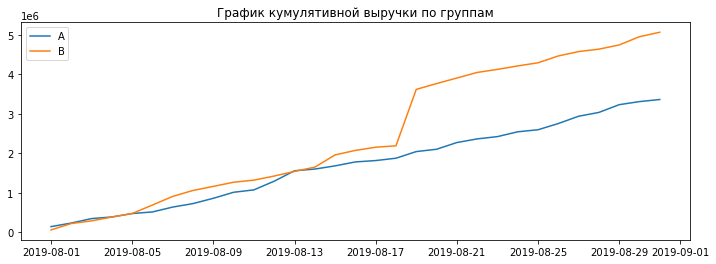

In [29]:
plt.figure(figsize=(12,4))
plt.plot(group_A['date'], group_A['revenue'], label = 'A')
plt.plot(group_B['date'], group_B['revenue'], label = 'B')
plt.title('График кумулятивной выручки по группам')
plt.legend();

группа B имеет стабильно лучший результат по кумулятивной выручке, а к концу 3 недели преимущество резко увеличивается

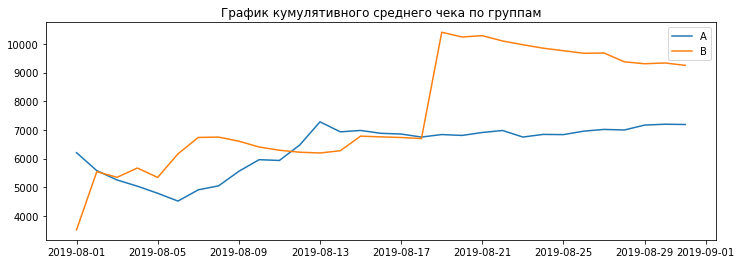

In [30]:
plt.figure(figsize=(12,4))
plt.plot(group_A['date'], group_A['mean'], label = 'A')
plt.plot(group_B['date'], group_B['mean'], label = 'B')
plt.title('График кумулятивного среднего чека по группам')
plt.legend();

изначально группа B уступает группе А по кумулятивному среднему чеку, но к концу 3 недели значительно опережает 

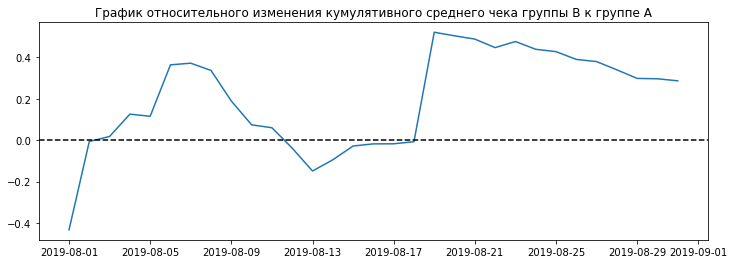

In [31]:
merge_groups = group_A.merge(group_B, left_on = 'date', right_on ='date', suffixes=['A', 'B'])
merge_groups
plt.figure(figsize=(12,4))
plt.plot(merge_groups['date'], merge_groups['meanB']/merge_groups['meanA'] - 1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--'); 

График относительного изменения кумулятивного среднего чека группы B к группе A, так же показывает значительное превосходство группы B над A к концу 3 недели и далее, однако заметны сильные скачки в обе стороны, до этого периода(возможно вызвано выбросами в данных)

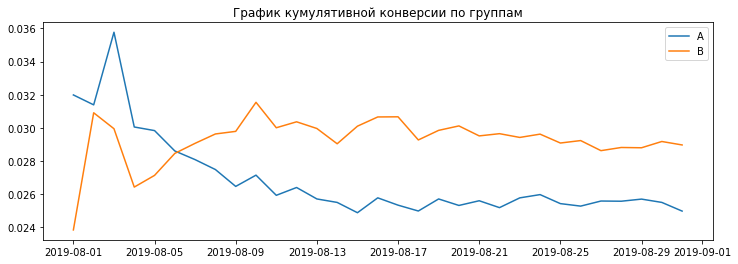

In [32]:
plt.figure(figsize=(12,4))
plt.plot(group_A['date'], group_A['conversion'], label = 'A')
plt.plot(group_B['date'], group_B['conversion'], label = 'B')
plt.title('График кумулятивной конверсии по группам')
plt.legend();

По кумулятивной конверсиигруппа A сначала превосходит группу B, но затем, к концу 1 недели начинает показывает стабильно худший результат, так же стоит сказать что со временем данные стабилизируютя и скачки пропадают.

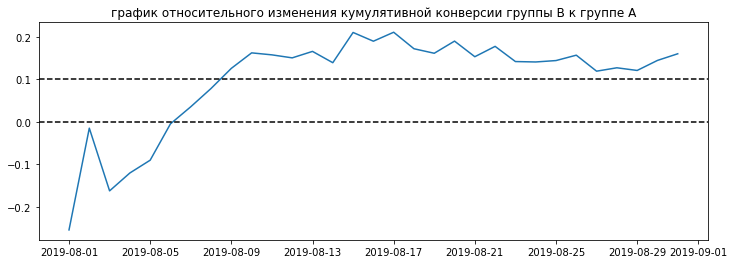

In [33]:
plt.figure(figsize=(12,4))
plt.plot(merge_groups['date'], merge_groups['conversionB']/merge_groups['conversionA'] - 1)
plt.title('график относительного изменения кумулятивной конверсии группы B к группе A')
plt.axhline(y=0.1, color='black', linestyle='--')
plt.axhline(y=0, color='black', linestyle='--');

По графику относительного изменения кумулятивной конверсии группы B к группе A можно сказать, что сначала группа B уступает, однако потом к концу первой недели догоняет группу A, и далее стабильно опережает более чем на 10 процентов(временами доходит до 20).

<a id="p4.2.2"></a>
#### 4.2.2  Выбивающиеся значения

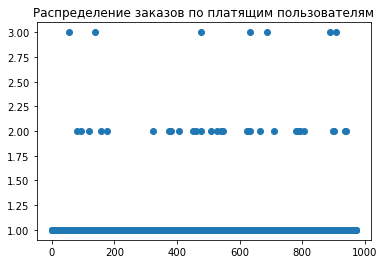

In [34]:
ordersByUsers = orders.groupby('visitor_id', as_index = False).agg({'transaction_id' : 'nunique'})
ordersByUsers.columns = ['user_id', 'orders'] 
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Распределение заказов по платящим пользователям');

Видно, что только 7 пользователей совершали 3 заказа

In [35]:
np.percentile(ordersByUsers['orders'],[95,99])

array([1., 2.])

Больше двух заказов совершает всего 1 процент пользователей

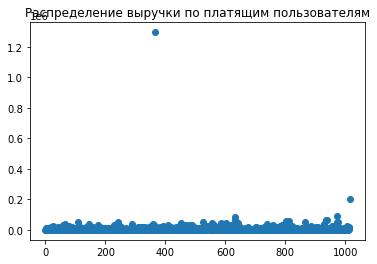

In [36]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Распределение выручки по платящим пользователям');

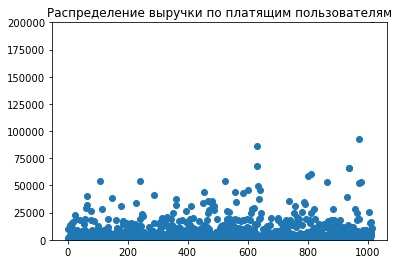

In [37]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.ylim(0,200000)
plt.title('Распределение выручки по платящим пользователям');

Неоднородность проявляется начиная с 25000

In [38]:
np.percentile(orders['revenue'],[95,99])

array([26785., 53904.])

<a id="p4.2.3"></a>
#### 4.2.3  Формулировка нулевых и альтернативных гипотиз


Сформулируем гипотезы, где H0 - нулевая гипотеза, H1 - альтернативная гипотеза

1) Н0: конверсии между группами по «сырым» данным равны; Н1: конверсии между группами по «сырым» данным различны;

2) Н0: конверсии между группами по «отфильтрованым» данным равны; Н1: конверсии между группами по «отфильтрованым» различны;

3) Н0: средние чеки заказов между группами по «сырым» данным равны; Н1 средние чеки заказов между группами по «сырым» различны;

4) Н0: средние чеки заказов между группами по «отфильтрованным» данным равны; Н1: средние чеки заказов между группами по «отфильтрованным» не равны;
   


<a id="p4.2.4"></a>
#### 4.2.4  Проверка статистических гипотез

Напишем функцию для распределения количества заказов по посетителям, которые распределены по группам. Тем кто ничего не заказал присвоим ноль и присоединим их списком пользователей, сделавших заказ, дополнительно добавим фильтр для выбивающихся значений.

In [39]:
def con(i,mx = 0, filt = False):
    ordersByUsers = orders.loc[orders['group'] == i].groupby('visitor_id', as_index = False).agg({'transaction_id' : 'nunique'})
    ordersByUsers.columns = ['user_id', 'orders']
    count = 0
    if filt:
        count = ordersByUsers[ordersByUsers['orders'] > mx]['orders'].count()
        ordersByUsers = ordersByUsers[ordersByUsers['orders'] <= mx]
    a = pd.Series(0, index = np.arange(visitors[visitors['group'] == i]['visitors'].sum() - len(ordersByUsers['orders'])-count), name = 'orders')
    sampleA = pd.concat((ordersByUsers['orders'], a), axis = 0)
    return sampleA, count

Проверим гипотезу 1.Применим функцию и проверим, если ли различия в распределении количества заказов между группами с помощью критерия Манна-Уитни(для данных с большими выбросами), а также найдем отношение конверсий данных групп.

In [40]:
sampleA, count = con('A')
sampleB, count = con('B')
print('p-value',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('conv',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value 0.011
conv 0.160


Для неочищенных данных, разница статистически значима, p-values < 0.05(отвергаем нулевую гипотезу), конверсия  группы B  больше конверсии группы A на 16 процентов

Проверим гипотезу 2 для очищенных данных.

In [41]:
np.percentile(ordersByUsers['orders'],[95,99])

array([1., 2.])

In [42]:
sampleAfilt, countA = con('A', mx = int(np.percentile(ordersByUsers['orders'],[99])), filt = True)
sampleBfilt, countB = con('B', mx = int(np.percentile(ordersByUsers['orders'],[99])), filt = True)
print('количество удаленных пользователей', countA+ countB)
print('p-value',"{0:.3f}".format(stats.mannwhitneyu(sampleAfilt, sampleBfilt)[1]))
print('conv',"{0:.3f}".format(sampleBfilt.mean() / sampleAfilt.mean() - 1))

количество удаленных пользователей 7
p-value 0.008
conv 0.185


После очистки данных статистическая значимость стала еще больше,
p-values < 0.01, конверсия группы B  больше конверсии группы A на 18 процентов(отвергаем нулевую гипотезу о равенстве конверсий)

Проверим гипотезу 3 для очищенных данных.

Напишем фунцию для разбивки заказов по группам, добавив фильт выручки с каждого заказа

In [43]:
def rev(i = 0):
    count = 0
    o = orders
    if i != 0:
        count = orders[orders['revenue'] > i]['revenue'].count() 
        o = orders[orders['revenue'] <= i]
    stat = round(stats.mannwhitneyu(o[o['group']=='A']['revenue'], o[o['group']=='B']['revenue'])[1],3)
    mean = round(o[o['group']=='B']['revenue'].mean()/o[o['group']=='A']['revenue'].mean()-1,3)
    return count, stat, mean

Применим функцию для определения статистической значимости различий в среднем чеке

In [44]:
count, stat, mean = rev(i = 0)
print('p-value', stat)
print('mean', mean)

p-value 0.829
mean 0.287


По неочищенным данным средний чек группы В превосходит группу А на 29 процентов, но разница между этими двумя группами статистически не значима, p-value намного больше 0.05(невозможно опровергнуть гипотезу о равенстве средних чеков в группах)

Проверим 4 гипотезу

In [45]:
count, stat, mean = rev(i = int(np.percentile(orders['revenue'],[99])))
print('Число удаленных из анализа пользователей',count)
print('p-value',stat)
print('mean',mean)

Число удаленных из анализа пользователей 9
p-value 0.901
mean -0.032


По очищенным данным средний чек группы В уже уступает группе А на 3 процента, но разница между этими двумя группами все также статистически не значима, p-value намного больше 0.05(невозможно опровергнуть гипотезу о равенстве средних чеков в группах)

<a id="p4.2.5"></a>
#### 4.2.5  Вывод

Различие  общей конверсий между группами А и B статистически значимо(в обоих случаях), фиксируем победу группы В по этому показателю(превосходит группу А более чем на 15 процентов) 

Различия в среднем чеке заказа между группами A и B статистически не значимы, нельзя сказать что группы отличны по этому показателю.

График различия конверсии между группами по времени сообщает, что результат группы B лучше группы A(к концу 3 недели группа В стабильно опережает группу А более чем на 10 процентов).

<a id="p5"></a>
## 5 Рекомендации

### 1) Признать гипотезу о добавлении формы подписки на все основные страницы, для того чтобы собрать базу клиентов для email-рассылок - приоритетной 

### 2) Остановить A/B тест, зафиксировать победу группы B по показателю конверсии.  

### 3) Дальнейшее  наблюдение за средним чеком признать нецелесообразным.  Различия в этом показатели абсолютно не являются статистически значимыми ,  учитывая время проведения теста и количество собранных данных, явных изменений уже не будет.

### 4) Остановить A/B тест